<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab, you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [260]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm


# Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import PredictionErrorDisplay
from sklearn.model_selection import train_test_split,cross_val_score

In [3]:
# Setting the default for all figure (figsize, fontsize, style, etc.)
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 9
sns.set_style("whitegrid")

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [5]:
house = pd.read_csv("datasets/sacramento_real_estate_transactions.csv")
house.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


In [6]:
house.shape

(985, 12)

In [7]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [8]:
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [9]:
house.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. **Report any notable findings.**

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [11]:
house.nunique()

street       981
city          39
zip           68
state          2
beds           8
baths          6
sq__ft       604
type           4
sale_date      5
price        605
latitude     969
longitude    967
dtype: int64

In [12]:
house = house.drop(columns=['street','zip','city'])

In [13]:
house['sale_date'].unique()

array(['Wed May 21 00:00:00 EDT 2008', 'Tue May 20 00:00:00 EDT 2008',
       'Mon May 19 00:00:00 EDT 2008', 'Fri May 16 00:00:00 EDT 2008',
       'Thu May 15 00:00:00 EDT 2008'], dtype=object)

In [14]:
# Change negetive 'sq__ft' to positive
print(house[house['sq__ft']<=0]['sq__ft'].unique()) 
house['sq__ft'] = house['sq__ft'].replace(-984,984)

# The number of assets with 0 square feet area 
print(len(house[house.sq__ft== 0]))
print((171/985)*100)
# About 17 percent of assets recorded to be 0 square, we decide to drop it.
house = house[(house.sq__ft > 0)]

[   0 -984]
171
17.36040609137056


In [15]:
# Beds, Baths and Price
print(len(house[house.beds<= 0]))
print(len(house[house.baths<= 0]))
print(len(house[house.price<= 0]))

# Change negetive 'price' to positive
print(house[house['price']<=0]['price'].unique()) 
house['price'] = house['price'].replace(-210944,210944)

0
0
1
[-210944]


In [16]:
house = house[(house.sq__ft > 0)]

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [18]:
house.to_csv('datasets/sacramento_real_estate_transactions_cleaned.csv', index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR (Simple Linear Regression) model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [20]:
# Variables that can be predictors(x) of price > beds, baths, sq__ft, price, latitude,and longitude

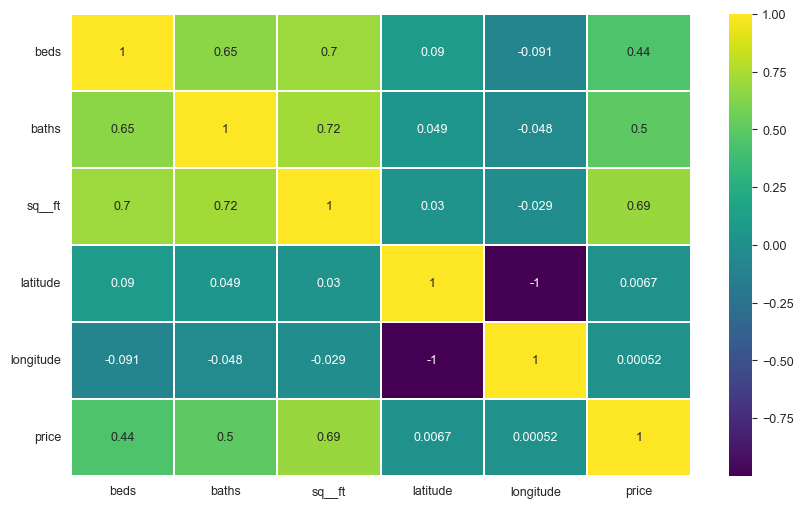

In [21]:
# Heatmap showing the correlation between variables
plt.figure(figsize=(10,6))
sns.heatmap(house[['beds', 'baths', 'sq__ft', 'latitude', 'longitude','price']].corr(), annot=True, linewidth=0.1,cmap='viridis')
plt.yticks(rotation=0)
plt.show()

### 4. Which variable would be the best predictor of `y` in an SLR (Simple Linear Regression) model? Why?

With the strongest correlation with the price, sq__ft is the best variable to prediect y in SLR model.

### 5. Write a function that will take in two lists, `x` and `y`, and returns the intercept and slope coefficients that minimize SSE (Sum of Squared Errors). 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Question #4.**
- **Report the slope and intercept.**

In [25]:
X = house['sq__ft']
y = house['price']

#### By Hand

In [27]:
# x
x_mean = X.mean()
print(f"The mean of x(sq__ft) is {x_mean:.2f}")
x_std = X.std()
print(f"The standard deviation of x(sq__ft) is {x_std:.2f}")
# y
y_mean = y.mean()
print(f"The mean of y(price) is {y_mean:.2f}")
y_std = y.std()
print(f"The standard deviation of y(price) is {y_std:.2f}")
# Correlation
r_xy = X.corr(y)
print(f"The the correlation of x and y is {r_xy:.2f}")
# coefficient on X
b1 = r_xy * (y_std / x_std)
print(f"Coefficient on X is {b1:.2f}")
# The intercept of the model
b0 = y_mean - (b1*x_mean)
print(f"Intercept of the model is {b0:.2f}")

The mean of x(sq__ft) is 1591.15
The standard deviation of x(sq__ft) is 663.84
The mean of y(price) is 229448.37
The standard deviation of y(price) is 119825.58
The the correlation of x and y is 0.69
Coefficient on X is 125.22
Intercept of the model is 30210.63


#### Function (1)

In [29]:
def lin_reg(x, y):
    # Calculate the slope (beta1) of the linear regression line
    beta1 = (scipy.stats.pearsonr(x, y)[0] * np.std(y) / np.std(x))
    # Breaks down of the beta1 calculation:
    # 1. scipy.stats.pearsonr(x, y)[0]: Computes the Pearson correlation coefficient between x and y
    #    This measures the strength and direction of the linear relationship between x and y
    #    The [0] index is used because pearsonr returns a tuple (correlation, p-value)
    # 2. np.std(y) / np.std(x): A ratio of standard deviations
    #    This adjusts the scale of the relationship based on the spread of x and y
    # 3. Multiplying these gives us the slope that best fits the data

    # Calculates the y-intercept (beta0) using the means of x and y
    beta0 = np.mean(y) - (beta1 * np.mean(x))
    # Breakdown of the beta0 calculation:
    # 1. np.mean(y): Calculates the average of all y values
    # 2. beta1 * np.mean(x): Multiplies the slope by the average of all x values
    # 3. Subtracting beta1 from np.mean(y) gives us the y-intercept
    # This formula is derived from the point-slope form of a line: y - y' = m(x - x')
    # Where (x', y') is the point (mean(x), mean(y))

    # Returns the y-intercept and slope as a tuple
    return print(f" The coefficient on X is {beta1:.2f} and the intercept of the model is {beta0:.2f}")
    # The function returns two values:
    # 1. beta0: The y-intercept of the regression line
    # 2. beta1: The slope of the regression line
    # These two values define the simple linear regression equation: y = beta0 + beta1 * x

lin_reg(X, y)

 The coefficient on X is 125.22 and the intercept of the model is 30210.63


### 6. Now interpret the intercept and the slope.

While hoilding other things constant, for every 1 unit increase in area of the asset (square feet), we can expect an increase of 125.22 units in sales (125.22 dollars).
The initial price of assts is about 30,210.63 dollars.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

Note<br>
Inference: Given a set of data you want to infer how the output is generated as a function of the data. <br>
Prediction: Given a new measurement, you want to use an existing data set to build a model that reliably chooses the correct identifier from a set of outcomes.

__Answer__ <br>
__Inference:__ This model can find out what the effect of each features which could be the number of beds, baths, area(sq__ft), latitude and longitude has on price of assets. For example, How the number of beds and baths and the prices ? How much extra will a asset be worth if it has more baths. <br>
__Prediction:__ Predicting the value of the assets given its characteristics or features based on historical data. For example, What is the value of the asset if there are 2 beds, 1 bath and 50 square feet.

### 8: Using the model you came up with in Question #5, calculate and plot the residuals.

In [35]:
y_preds = b0 + b1 * X
y_preds

house['predictions'] = y_preds

house['residuals'] = house['price'] - house['predictions']
house['residuals']

0      -75669.616731
1     -108126.273822
2      -61002.957264
3      -67588.080518
4      -48108.173751
           ...      
980    -83279.223497
981     18844.615307
982     52526.118330
983     -5899.413922
984     34982.511275
Name: residuals, Length: 814, dtype: float64

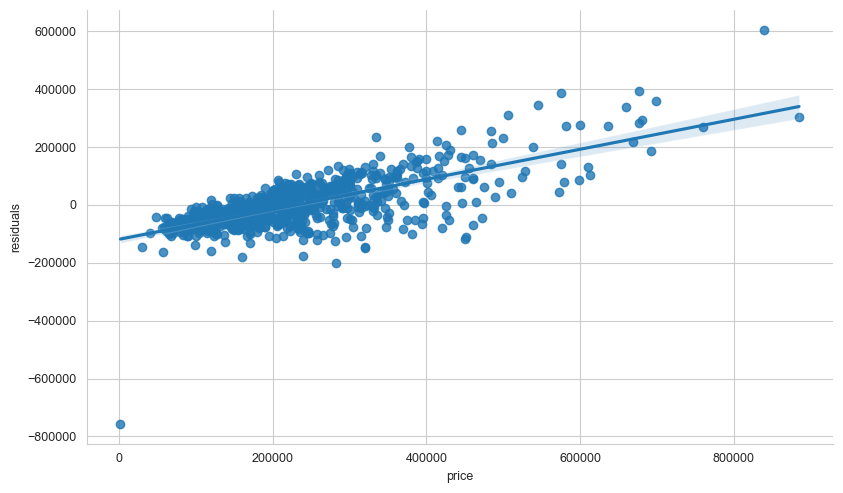

In [36]:
sns.lmplot(x='price', y='residuals', data=house, height=5,aspect=1.7);

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [39]:
house['sale_date'].unique()

array(['Wed May 21 00:00:00 EDT 2008', 'Tue May 20 00:00:00 EDT 2008',
       'Mon May 19 00:00:00 EDT 2008', 'Fri May 16 00:00:00 EDT 2008',
       'Thu May 15 00:00:00 EDT 2008'], dtype=object)

In [40]:
house['sale_day'] = house['sale_date'].str.split(" ", n=1, expand=True)[0]
house = house.join(pd.get_dummies(house['sale_day'],dtype=float))

In [41]:
house['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [42]:
house = house.join(pd.get_dummies(house['type'],dtype=float))

### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [44]:
house = house.drop(columns=['sale_date','sale_day','predictions','latitude','longitude'])

In [45]:
house.head()

,state,beds,baths,sq__ft,type,price,residuals,Fri,Mon,Thu,Tue,Wed,Condo,Multi-Family,Residential
0,CA,2,1,836,Residential,59222,-75669.616731,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,CA,3,1,1167,Residential,68212,-108126.273822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,CA,2,1,796,Residential,68880,-61002.957264,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,CA,2,1,852,Residential,69307,-67588.080518,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,CA,2,1,797,Residential,81900,-48108.173751,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### 11. Build what you think may be the best MLR (Multiple Linear Regression) model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
# Model 1
X = house[['beds', 'baths', 'sq__ft','Multi-Family','Residential']]
y = house['price'] 

lr = LinearRegression()
lr.fit(X, y)

print(lr.intercept_)
print(lr.coef_)

22436.149044582213
[-14447.57576263   8104.1001454     130.83028256 -26178.25907335
  32437.02588848]


### 12. Plot the true price vs the predicted price to evaluate your MLR (Multiple Linear Regression) visually.

You can use matplotlib or seaborn.

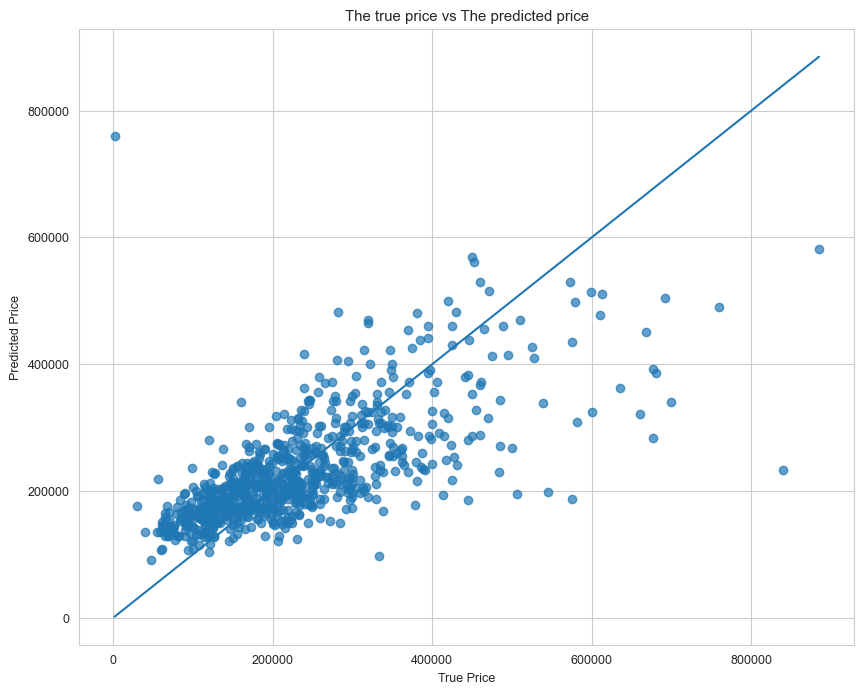

In [50]:
# Plot the true prices (y) vs. the predicted price (y_preds)
plt.figure(figsize=(10,8))
plt.scatter(y, y_preds, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()])


plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('The true price vs The predicted price')
plt.show()

### 13. List the five assumptions for an MLR (Multiple Linear Regression) model. 

Indicate which ones are the same as the assumptions for an SLR model. 

SLR AND MLR:
* Linearity : There exists a linear relationship between each predictor variable and the response variable.
* Independence of error : Errors or residuals must be independent of one another.
* Normality : The residuals of the model are normally distributed.
* Equality of Variances (Homoscedasticity): the residuals have constant variance at every point in the linear model. When this is not the case, the residuals are said to suffer from heteroscedasticity.When heteroscedasticity is present in a regression analysis, the results of the regression model become unreliable.

MLR ONLY:
* Independence of independent variables (No Multicollinearity): None of the predictor variables are highly correlated with each other.

### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

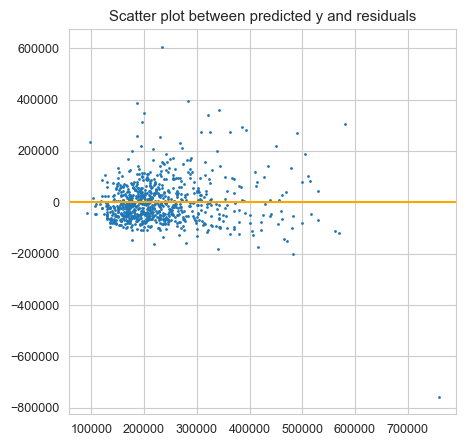

In [54]:
# E - Equality of Variances
# Plot our residuals to check Equality of Variances
plt.scatter(y_preds,house['residuals'], s=1)
plt.axhline(0, color ='orange')
plt.title('Scatter plot between predicted y and residuals');
# The Equality of Variances assumption might be violated since the residual is not constant in every point.

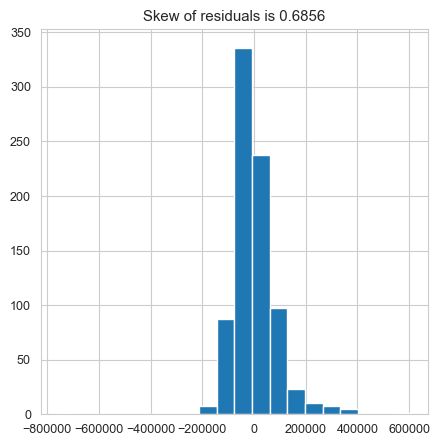

In [55]:
# N - Normality assumption 
plt.hist(house['residuals'], bins=20)
plt.title(f"Skew of residuals is {pd.Series(house['residuals']).skew():.4f}")
plt.show()
# The normality assumption might be violated since a positive value (0.6856) for skewness 
# indicates that 
# the residual is relatively right skewed.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [57]:
model = sm.OLS(y,X).fit()
X = sm.add_constant(X) 
y = house['price'] 

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X)
model = model.fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          4.44e-116
Time:                        22:51:55   Log-Likelihood:                -10398.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     808   BIC:                         2.084e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.244e+04   1.55e+04      1.448      0.148   -7971.936    5.28e+04
beds         -1.445e+04   5454.607     -2.649      0.008   -2.52e+04   -3740.704
baths         8104.1001   6949.164      1.166      0.244   -5536.444    2.17e+04
sq__ft         130.8303      7.331     17.847      0.000     116.441     145.220
Multi-Family -2.618e+04   2.93e+04     -0.894      0.372   -8.36e+04    3.13e+04
Residential   3.244e+04   1.46e+04      2.215      0.027    3686.742    6.12e+04
==============================================================================
Omnibus:                      215.963   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6832.550
Skew:                           0.501   Prob(JB):                         0.00
Kurtosis:                      17.158   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [132]:
def r2_adj(y_true, y_preds, p):
     n = len(y_true)
     y_mean = np.mean(y_true)
     numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
     denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
     return 1 - numerator / denominator
    
r2_adj(y, y_preds,5)

0.48333015982263894

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [203]:
print(f"MAE is {metrics.mean_absolute_error(y, y_preds):.2f}.")
print(f"MSE is {metrics.mean_squared_error(y, y_preds):.2f}.")
print(f"RMSE is {metrics.root_mean_squared_error(y, y_preds):.2f}.")
print(f"R-squared is {metrics.r2_score(y, y_preds):.4f}.")
print(f"Adjusted R-squared is {r2_adj(y, y_preds,5):.4f}.")

MAE is 59622.69.
MSE is 7363751393.94.
RMSE is 85812.30.
R-squared is 0.4865.
Adjusted R-squared is 0.4833.


- MAE is 59,622.69. It implies that, on average, the prediction's distance from the true value is $59,622.69.
  
- MSE is 7,363,751,393.94. It suggests that, on average of the squared, this model’s predictions deviate by approximately $7,363,751,393.94 from the true price of assets.
  
- RMSE is 85,812.30. It indicates that on average, the prdicted price is $85812.30 off from the observed price.
  
- R-squared is 0.4865. It means that 48.65% of the variability in housing price is explained by the area of asset, number of bedrooms and bathrooms,and type of asset in the model

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

In [215]:
house.columns

Index(['state', 'beds', 'baths', 'sq__ft', 'type', 'price', 'residuals', 'Fri',
       'Mon', 'Thu', 'Tue', 'Wed', 'Condo', 'Multi-Family', 'Residential'],
      dtype='object')

MAE is 59860.58
MSE is 7354572636.84
RMSE is 85758.81
R-squared is 0.4871.
Adjuseted R-squared is 0.4840


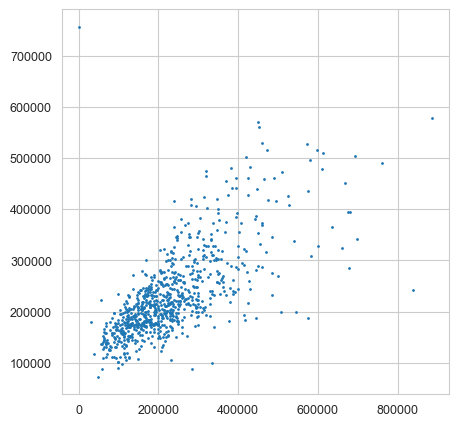

In [287]:
# Model 2
X = house[['baths', 'sq__ft','Multi-Family','Residential']]
y = house['price'] 

lr = LinearRegression()
lr.fit(X, y)

y_preds = lr.predict(X)
print(f"MAE is {metrics.mean_absolute_error(y, y_preds):.2f}")
print(f"MSE is {metrics.mean_squared_error(y, y_preds):.2f}")
print(f"RMSE is {metrics.root_mean_squared_error(y, y_preds):.2f}")
print(f"R-squared is {metrics.r2_score(y, y_preds):.4f}.")
print(f"Adjuseted R-squared is {r2_adj(y, y_preds,5):.4f}")

plt.scatter(y, y_preds, s = 1);

In [289]:
# Different 75/25 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit our model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train score
print(f"Train R-squared Score: {lr.score(X_train, y_train)}")
       
# Test score
print(f"Test R-squared Score: {lr.score(X_test, y_test)}")

Train R-squared Score: 0.5074975155877994
Test R-squared Score: 0.4024847847034213


MAE is 59058.87
MSE is 7303537816.26
RMSE is 85460.74
R-squared is 0.4907.
Adjuseted R-squared is 0.4876


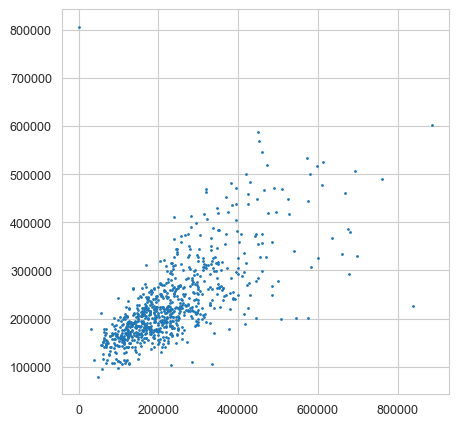

In [291]:
# Model 3
X = house[['beds', 'sq__ft','Multi-Family','Residential']]
y = house['price'] 

lr = LinearRegression()
lr.fit(X, y)

y_preds = lr.predict(X)
print(f"MAE is {metrics.mean_absolute_error(y, y_preds):.2f}")
print(f"MSE is {metrics.mean_squared_error(y, y_preds):.2f}")
print(f"RMSE is {metrics.root_mean_squared_error(y, y_preds):.2f}")
print(f"R-squared is {metrics.r2_score(y, y_preds):.4f}.")
print(f"Adjuseted R-squared is {r2_adj(y, y_preds,5):.4f}")

plt.scatter(y, y_preds, s = 1);

In [293]:
# Different 75/25 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit our model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train score
print(f"Train R-squared Score: {lr.score(X_train, y_train)}")
       
# Test score
print(f"Test R-squared Score: {lr.score(X_test, y_test)}")

Train R-squared Score: 0.5104902971387244
Test R-squared Score: 0.4119289638431912


MAE is 58749.67.
MSE is 7121524817.59
RMSE is 84389.13
R-squared is 0.5034.
Adjuseted R-squared is 0.5003


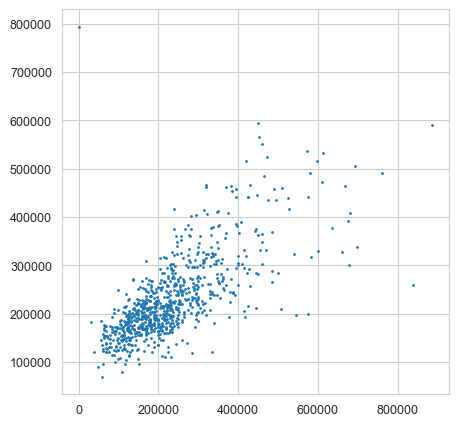

In [295]:
# Model 4
X = house[['beds', 'baths','sq__ft','Fri','Mon', 'Thu', 'Tue','Multi-Family','Residential']]
y = house['price'] 

lr = LinearRegression()
lr.fit(X, y)

y_preds = lr.predict(X)
print(f"MAE is {metrics.mean_absolute_error(y, y_preds):.2f}.") 
print(f"MSE is {metrics.mean_squared_error(y, y_preds):.2f}")
print(f"RMSE is {metrics.root_mean_squared_error(y, y_preds):.2f}")
print(f"R-squared is {metrics.r2_score(y, y_preds):.4f}.")
print(f"Adjuseted R-squared is {r2_adj(y, y_preds,5):.4f}")

plt.scatter(y, y_preds, s = 1);

In [297]:
# Different 75/25 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit our model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Train score
print(f"Train R-squared Score: {lr.score(X_train, y_train)}")
       
# Test score
print(f"Test R-squared Score: {lr.score(X_test, y_test)}")

Train R-squared Score: 0.522828867739918
Test R-squared Score: 0.41871773929421774


### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

In [308]:
# Randomly assign every observation to either universe 1 or universe 2.
np.random.seed(12345)
# randint(low, high=None, size=None, dtype=int) > Return random integers from `low` (inclusive) to `high` (exclusive).
house['universe'] = np.random.randint(1,3,len(house))

In [310]:
house['universe'].value_counts()

universe
2    414
1    400
Name: count, dtype: int64

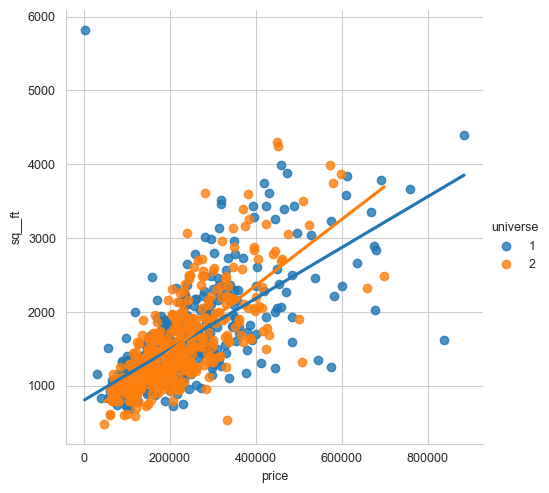

In [314]:
sns.lmplot(x='price',y= 'sq__ft',data= house,hue='universe',ci=False)
plt.show()

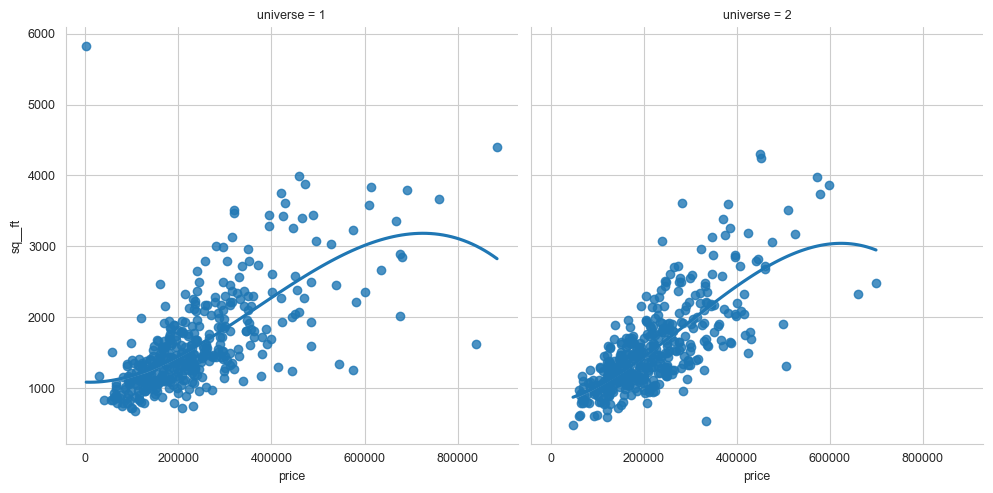

In [344]:
sns.lmplot(x='price',y= 'sq__ft',data= house,col='universe',ci=False,order = 3)
plt.show()

Resulting in underperformance on both training and test data. It can be conclded that this model is high Bias(underfitting) model struggles to find the pattern in the data.
